<a href="https://colab.research.google.com/github/Shyamkumarnagilla/Lung-Cancer-Detection/blob/main/Lung_Cancer_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Lung Cancer Detection**

# Importing Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report , accuracy_score
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings("ignore")

In [ ]:
#importing dataset
df=pd.read_csv('/content/survey lung cancer.csv')

In [ ]:
#Reading dataset
df.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO


In [ ]:
df.tail()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
304,F,56,1,1,1,2,2,2,1,1,2,2,2,2,1,YES
305,M,70,2,1,1,1,1,2,2,2,2,2,2,1,2,YES
306,M,58,2,1,1,1,1,1,2,2,2,2,1,1,2,YES
307,M,67,2,1,2,1,1,2,2,1,2,2,2,1,2,YES
308,M,62,1,1,1,2,1,2,2,2,2,1,1,2,1,YES


# Exploratory Data Analysis

In [ ]:
df.shape

(309, 16)

In [ ]:
df.dtypes

,0
GENDER,object
AGE,int64
SMOKING,int64
YELLOW_FINGERS,int64
ANXIETY,int64
PEER_PRESSURE,int64
CHRONIC DISEASE,int64
FATIGUE,int64
ALLERGY,int64
WHEEZING,int64


In [ ]:
df.describe()

,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN
count,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000
mean,62.673139,1.563107,1.569579,1.498382,1.501618,1.504854,1.673139,1.556634,1.556634,1.556634,1.579288,1.640777,1.469256,1.556634
std,8.210301,0.496806,0.495938,0.500808,0.500808,0.500787,0.469827,0.497588,0.497588,0.497588,0.494474,0.480551,0.499863,0.497588
min,21.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,57.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
50%,62.000000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,2.000000
75%,69.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
max,87.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000


In [ ]:
df.describe(include="object")

,GENDER,LUNG_CANCER
count,309,309
unique,2,2
top,M,YES
freq,162,270


In [ ]:
df.columns

Index(['GENDER', 'AGE', 'SMOKING', 'YELLOW_FINGERS', 'ANXIETY',
       'PEER_PRESSURE', 'CHRONIC DISEASE', 'FATIGUE ', 'ALLERGY ', 'WHEEZING',
       'ALCOHOL CONSUMING', 'COUGHING', 'SHORTNESS OF BREATH',
       'SWALLOWING DIFFICULTY', 'CHEST PAIN', 'LUNG_CANCER'],
      dtype='object')

In [ ]:
df.isnull().sum()

,0
GENDER,0
AGE,0
SMOKING,0
YELLOW_FINGERS,0
ANXIETY,0
PEER_PRESSURE,0
CHRONIC DISEASE,0
FATIGUE,0
ALLERGY,0
WHEEZING,0


In [ ]:
df.duplicated().sum()

33

In [ ]:
#Remove duplicates
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

In [ ]:
df['GENDER']=df['GENDER'].replace(['M', 'F'],[0,1])
df['LUNG_CANCER']=df['LUNG_CANCER'].replace(['YES', 'NO'],[1,0])

#Target column

In [ ]:
#Patient has lung cancer = 1 , Patient not having lung cancer = 0
df['LUNG_CANCER'].unique()

array([1, 0])

In [ ]:
# Canceled=1, Not canceled= 0
df['LUNG_CANCER'].value_counts()

,count
LUNG_CANCER,
1,238
0,38


# Show value counts for each coluumn

In [ ]:
coluumns =['GENDER', 'AGE', 'SMOKING','YELLOW_FINGERS', 'ANXIETY',
       'PEER_PRESSURE', 'CHRONIC DISEASE', 'FATIGUE ', 'ALLERGY ', 'WHEEZING',
       'ALCOHOL CONSUMING', 'COUGHING', 'SHORTNESS OF BREATH',
       'SWALLOWING DIFFICULTY', 'CHEST PAIN']


for col in coluumns:
    d_type = df[col].dtype

    counts =df[col].value_counts()
    print(f"Counts for {col}:")
    print(counts)
    print("__________________________________________________________")

Counts for GENDER:
GENDER
0    142
1    134
Name: count, dtype: int64
__________________________________________________________
Counts for AGE:
AGE
64    18
60    16
56    16
62    16
59    15
63    15
70    14
61    14
67    11
69    10
55    10
72    10
68     9
71     9
57     9
77     9
58     8
54     7
74     6
65     5
51     5
75     5
73     4
52     4
53     4
66     4
76     3
47     3
49     3
48     2
44     2
78     2
81     2
21     1
79     1
38     1
39     1
87     1
46     1
Name: count, dtype: int64
__________________________________________________________
Counts for SMOKING:
SMOKING
2    150
1    126
Name: count, dtype: int64
__________________________________________________________
Counts for YELLOW_FINGERS:
YELLOW_FINGERS
2    159
1    117
Name: count, dtype: int64
__________________________________________________________
Counts for ANXIETY:
ANXIETY
1    139
2    137
Name: count, dtype: int64
__________________________________________________________
Counts f

# Data Visualization

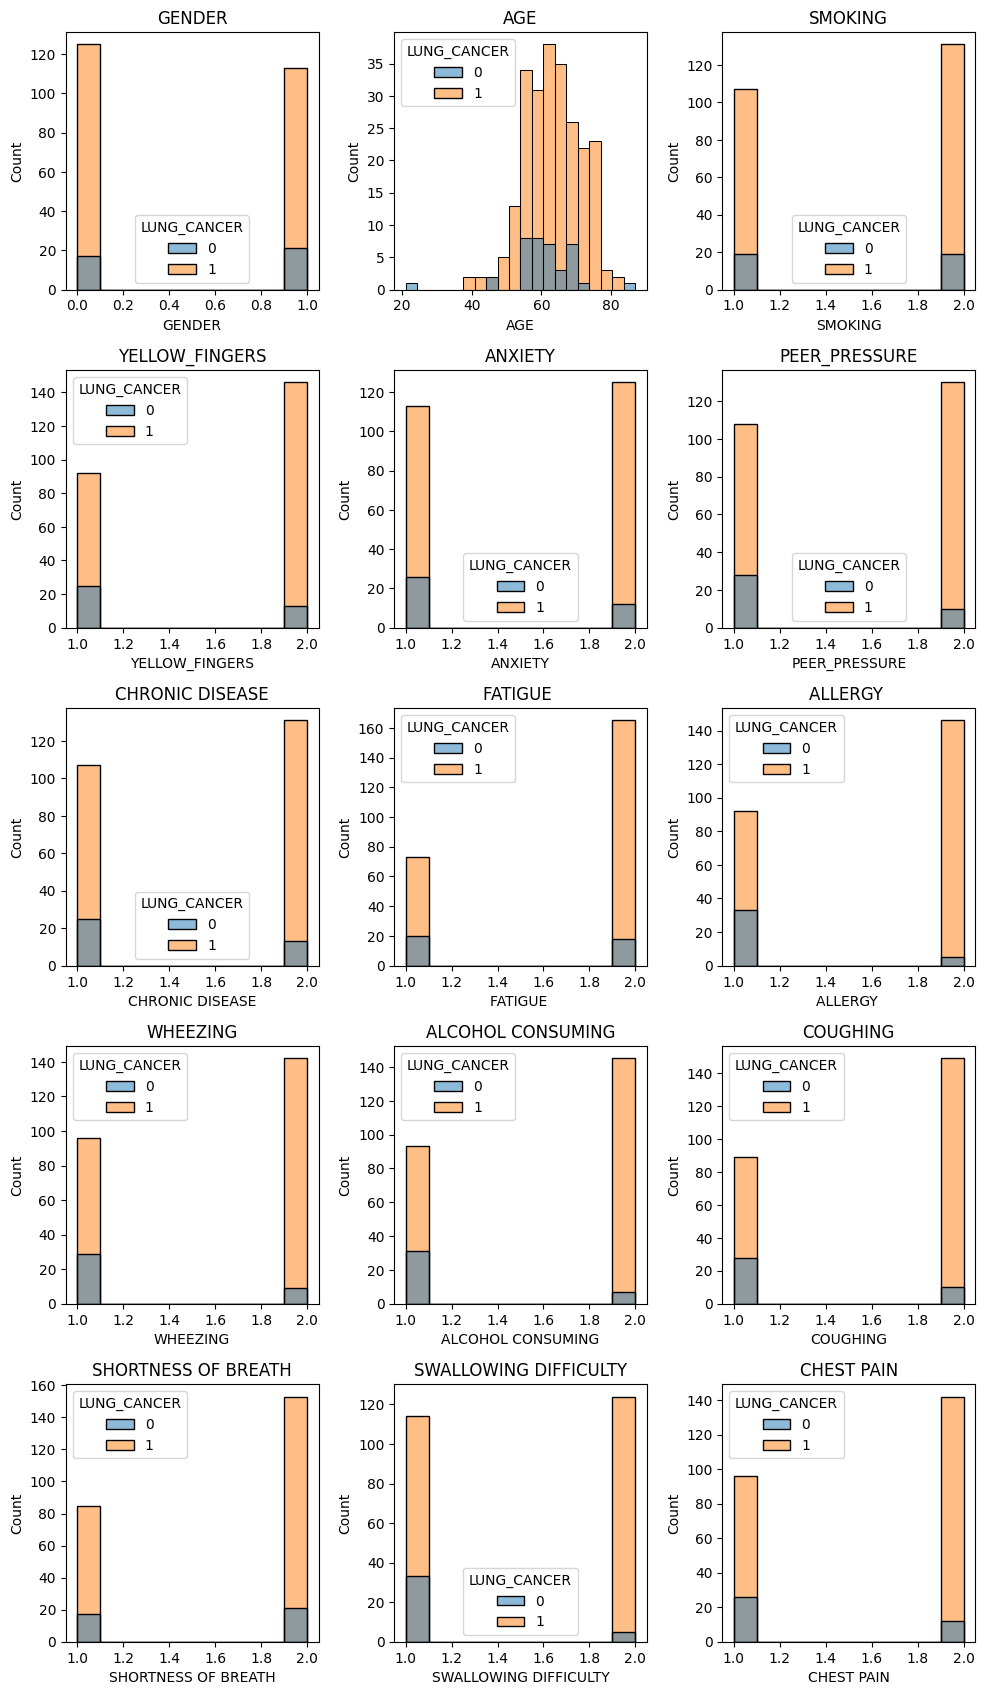

In [ ]:
num_list=['GENDER', 'AGE', 'SMOKING', 'YELLOW_FINGERS', 'ANXIETY',
       'PEER_PRESSURE', 'CHRONIC DISEASE', 'FATIGUE ', 'ALLERGY ', 'WHEEZING',
       'ALCOHOL CONSUMING', 'COUGHING', 'SHORTNESS OF BREATH',
       'SWALLOWING DIFFICULTY', 'CHEST PAIN']
fig = plt.figure(figsize=(10,20))

for i in range(len(num_list)):
    plt.subplot(6,3,i+1)
    plt.title(num_list[i])
    sns.histplot(data=df,x=df[num_list[i]],hue='LUNG_CANCER')

plt.tight_layout()

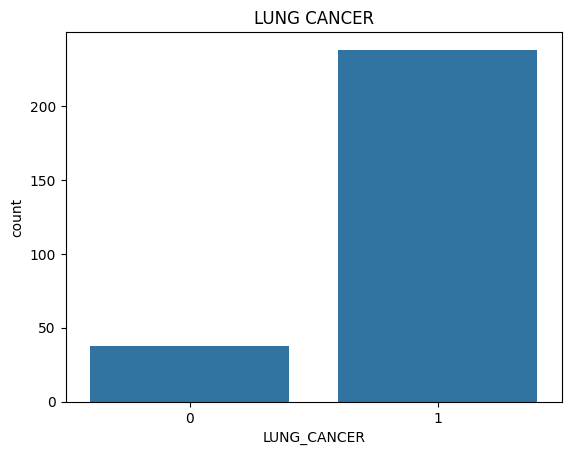

In [77]:
#target column
sns.countplot(x=df['LUNG_CANCER'])
plt.title('LUNG CANCER');

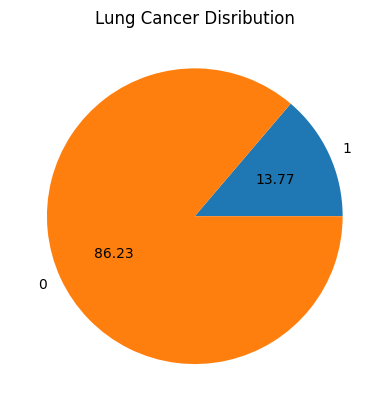

In [ ]:
#Another graph for "is_canceled" column
plt.pie(df.groupby(by=["LUNG_CANCER"]).size(), labels = df["LUNG_CANCER"].unique(), autopct = "%0.2f")
plt.title('Lung Cancer Disribution');
plt.show()

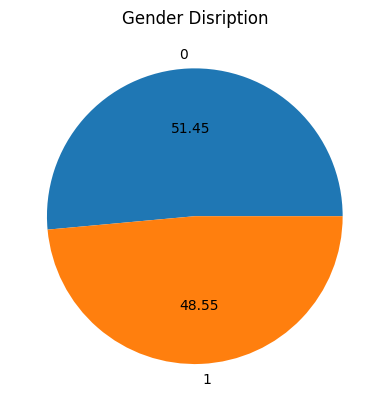

In [ ]:
#Gender Disription

plt.pie(df.groupby(by=["GENDER"]).size(), labels = df["GENDER"].unique(), autopct = "%0.2f")
plt.title('Gender Disription')
plt.show()

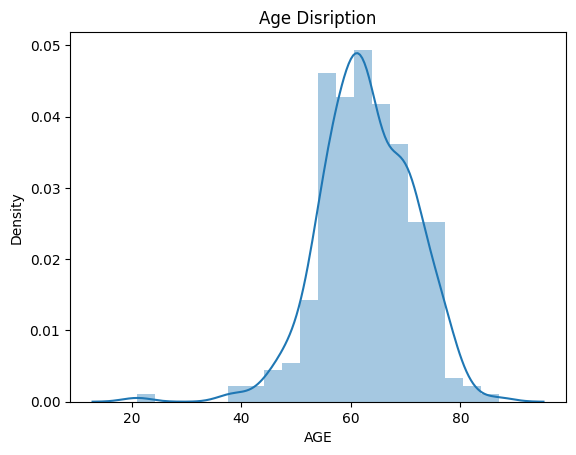

In [ ]:
# Age Disription

sns.distplot(df['AGE'])
plt.title("Age Disription")
plt.show()

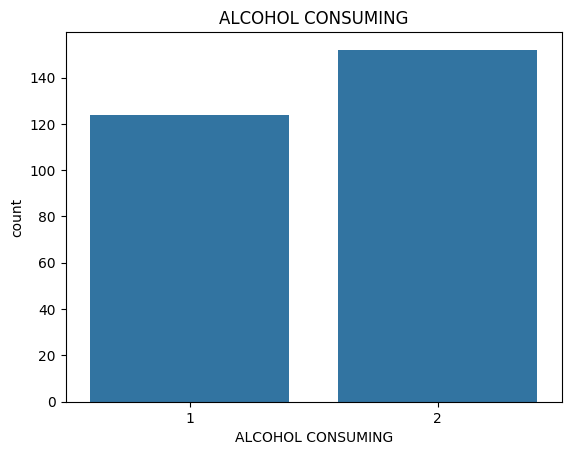

In [ ]:
#Alcohol Consuming

sns.countplot(x=df['ALCOHOL CONSUMING'])
plt.title('ALCOHOL CONSUMING');

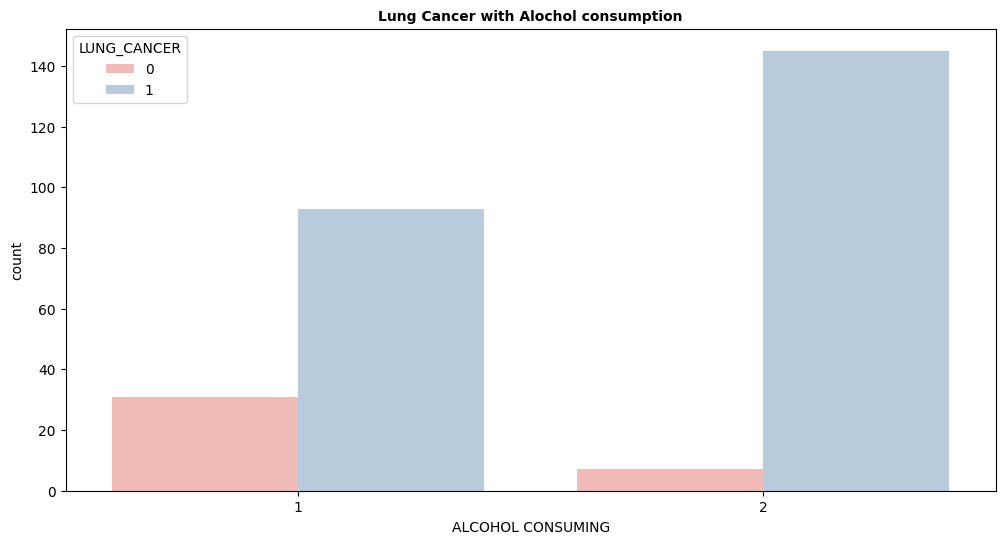

In [ ]:
plt.figure(figsize=(12, 6))

sns.countplot(x='ALCOHOL CONSUMING',hue="LUNG_CANCER", data=df,palette='Pastel1')
plt.title("Lung Cancer with Alochol consumption",fontweight="bold", size=10)
plt.show()

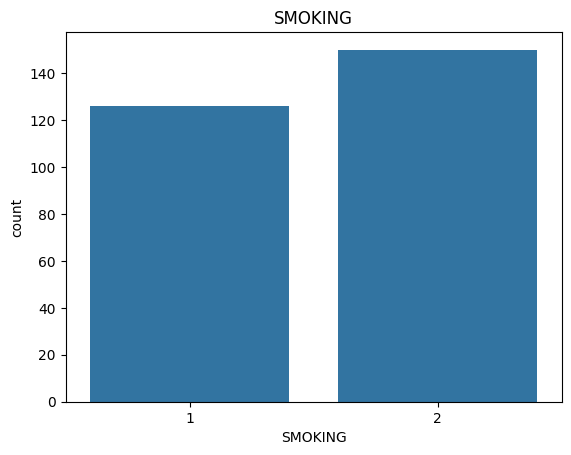

In [ ]:
#Smoking

sns.countplot(x=df['SMOKING'])
plt.title('SMOKING');

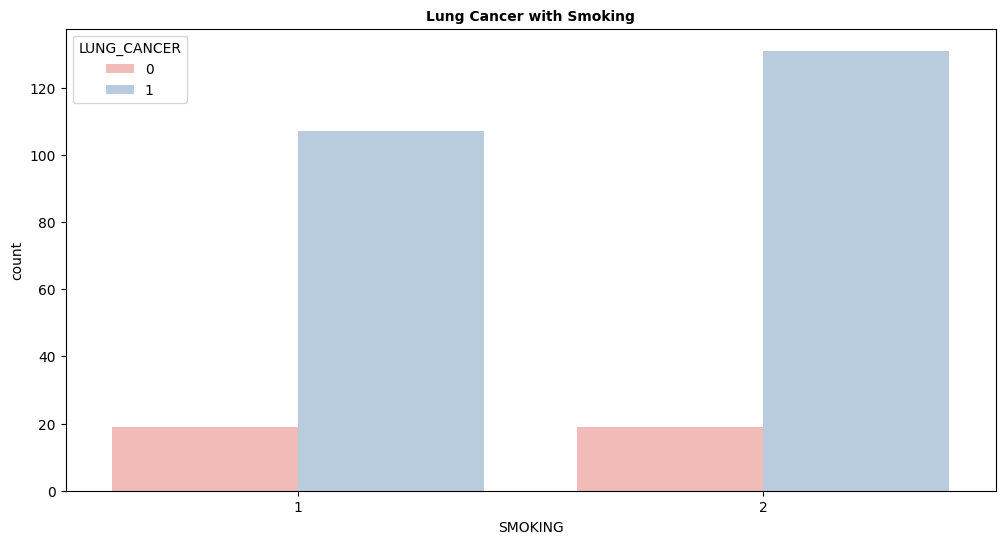

In [ ]:
plt.figure(figsize=(12, 6))

sns.countplot(x='SMOKING',hue="LUNG_CANCER", data=df,palette='Pastel1')
plt.title("Lung Cancer with Smoking",fontweight="bold", size=10)
plt.show()

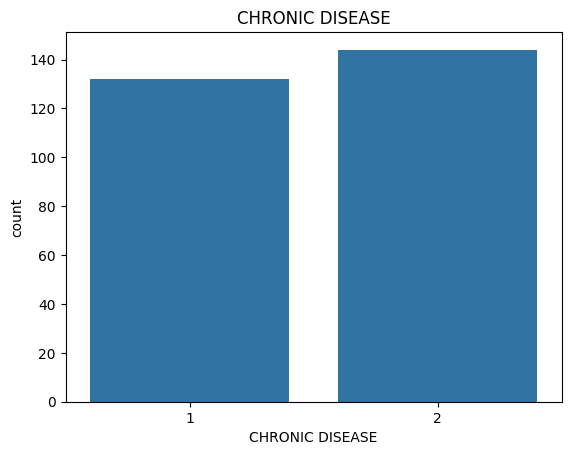

In [ ]:
#Chronic Disease

sns.countplot(x=df['CHRONIC DISEASE'])
plt.title('CHRONIC DISEASE');

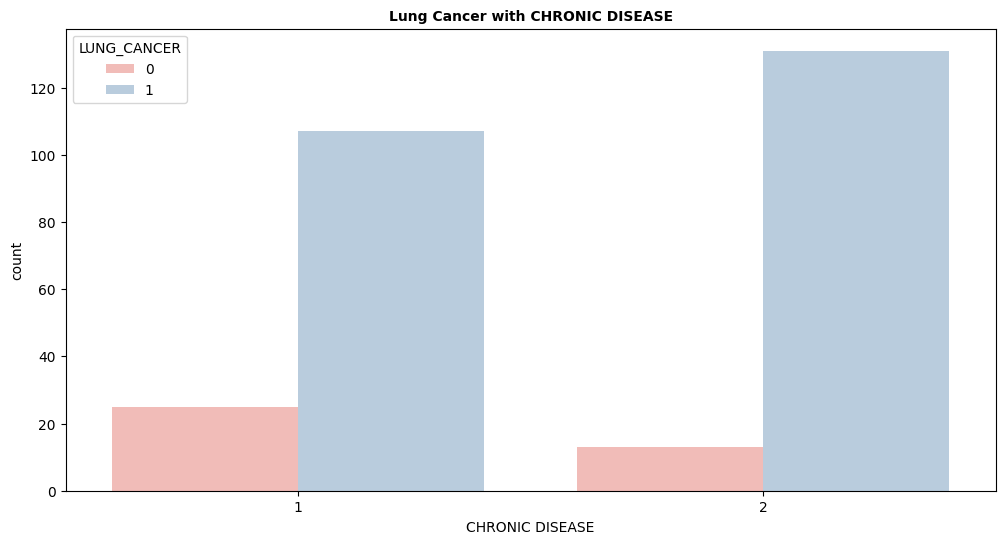

In [ ]:
plt.figure(figsize=(12, 6))

sns.countplot(x='CHRONIC DISEASE',hue="LUNG_CANCER", data=df,palette='Pastel1')
plt.title("Lung Cancer with CHRONIC DISEASE",fontweight="bold", size=10)
plt.show()

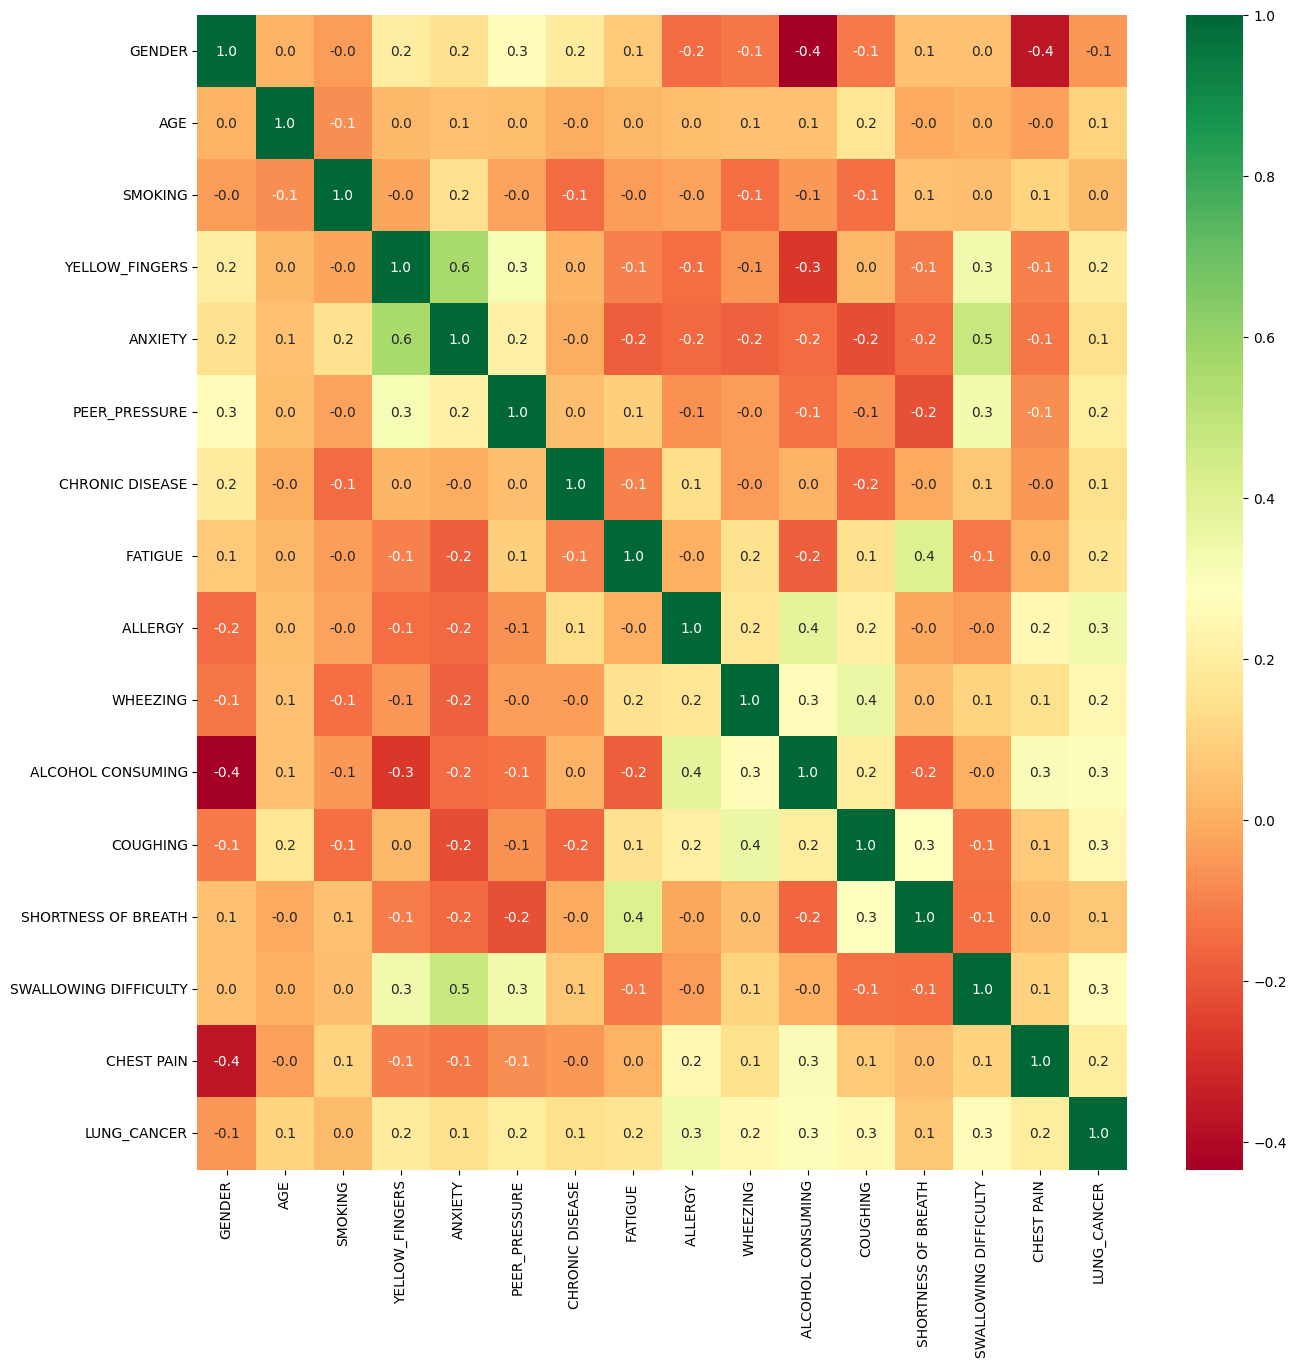

In [68]:
plt.figure(figsize = (15,15))
sns.heatmap(df.corr(),annot=True, cbar=True, cmap='RdYlGn', fmt='.1f');

In [ ]:
X = df.drop('LUNG_CANCER', axis=1)
y = df['LUNG_CANCER']

In [61]:
X.shape , y.shape

((276, 15), (276,))

In [62]:
#Train Test Split
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size=0.2 , random_state=42)
X_train.shape , X_test.shape , y_train.shape , y_test.shape

((220, 15), (56, 15), (220,), (56,))

# **Model Selection**

# Support Vector Machine (SVM)

In [ ]:
from sklearn import svm
svc = svm.SVC(kernel='linear')
svc.fit(X_train, y_train)

SVC(kernel='linear')

In [ ]:
svc.score(X_train , y_train)

0.9318181818181818

In [ ]:
svc_pred = svc.predict(X_test)
svc_acc=accuracy_score(y_test , svc_pred)
svc_acc

0.9285714285714286

In [ ]:
print(classification_report(y_test , svc_pred))

              precision    recall  f1-score   support

           0       1.00      0.67      0.80        12
           1       0.92      1.00      0.96        44

    accuracy                           0.93        56
   macro avg       0.96      0.83      0.88        56
weighted avg       0.93      0.93      0.92        56



Text(95.72222222222221, 0.5, 'Truh')

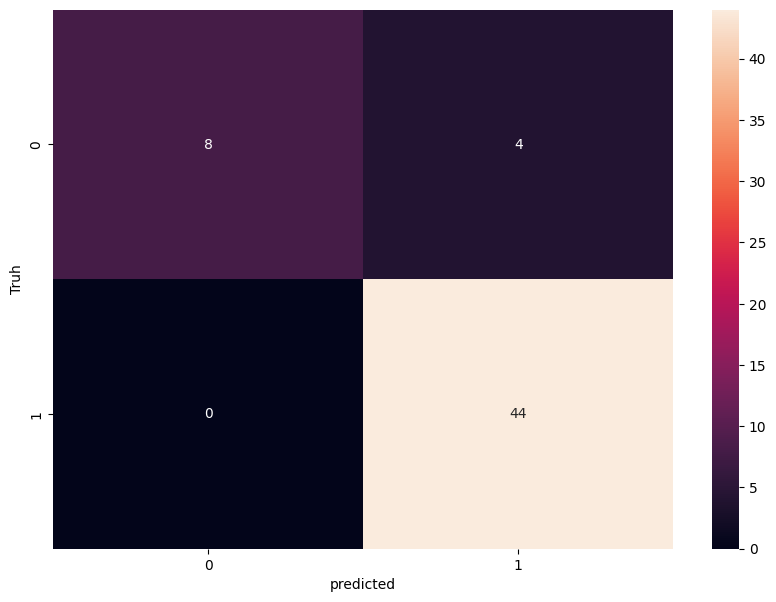

In [ ]:
cm1 = confusion_matrix(y_test,svc_pred)
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10,7))
sns.heatmap(cm1,annot=True)
plt.xlabel('predicted')
plt.ylabel('Truh')

# Random Forest

In [ ]:
RF_model = RandomForestClassifier(n_estimators=100)
RF_model.fit(X_train , y_train)

RandomForestClassifier()

In [ ]:
RF_model.score(X_train , y_train)


1.0

In [ ]:
RF_pred =RF_model.predict(X_test)
RF_acc=accuracy_score(y_test , RF_pred)
RF_acc

0.875

In [ ]:
print(classification_report(y_test , RF_pred))

              precision    recall  f1-score   support

           0       1.00      0.42      0.59        12
           1       0.86      1.00      0.93        44

    accuracy                           0.88        56
   macro avg       0.93      0.71      0.76        56
weighted avg       0.89      0.88      0.85        56



Text(95.72222222222221, 0.5, 'Truh')

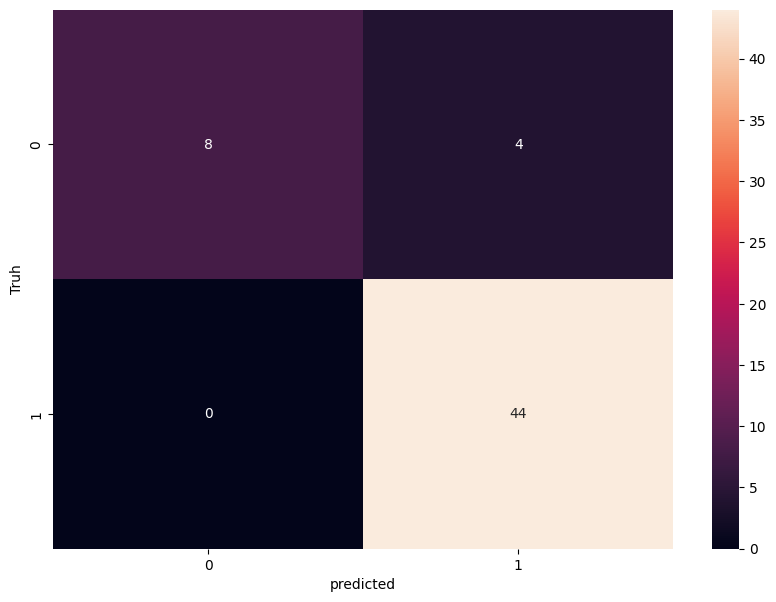

In [ ]:
cm2 = confusion_matrix(y_test,RF_pred)
plt.figure(figsize=(10,7))
sns.heatmap(cm1,annot=True)
plt.xlabel('predicted')
plt.ylabel('Truh')

# Decision Tree

In [ ]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [ ]:
dt.score(X_train , y_train)

1.0

In [ ]:
dt_pred = dt.predict(X_test)

In [ ]:
DT_acc=accuracy_score(y_test , dt_pred)
DT_acc

0.9107142857142857

In [ ]:
print(classification_report(y_test , dt_pred))

              precision    recall  f1-score   support

           0       1.00      0.58      0.74        12
           1       0.90      1.00      0.95        44

    accuracy                           0.91        56
   macro avg       0.95      0.79      0.84        56
weighted avg       0.92      0.91      0.90        56



Text(95.72222222222221, 0.5, 'Truth')

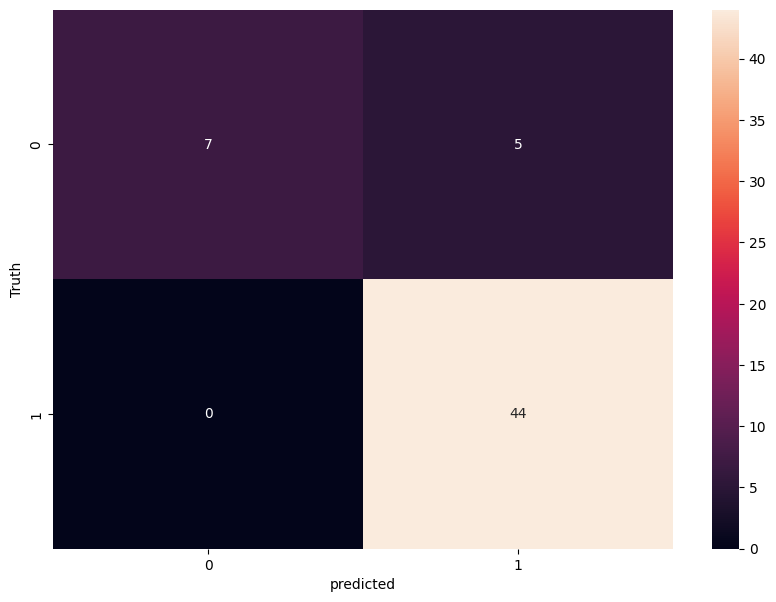

In [ ]:
cm3 = confusion_matrix(y_test,dt_pred)
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10,7))
sns.heatmap(cm3,annot=True)
plt.xlabel('predicted')
plt.ylabel('Truth')

# Models scores

In [ ]:
models=pd.DataFrame({
    'models':['Random_forest','SVC','Decsion_Treee'],
    'scores':[RF_acc,svc_acc,DT_acc]})
models.sort_values(by='scores',ascending=True)

,models,scores
0,Random_forest,0.875000
2,Decsion_Treee,0.910714
1,SVC,0.928571
